## Exponential Smoothing Method

In [94]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('../data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Data Preprocessing

In [96]:
# Converting Date Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [97]:
# Setting Datetime as Index
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Model Building

In [98]:
# Splitting the Dataset
data = dt[['Close']]
train_size = int(len(data) * 0.80) # 80% split

train, test = data.iloc[:train_size], data.iloc[train_size:]

#### Fitting Model

In [99]:
# Fitting Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Seasonal Model with additive trend and seasonality
model = ExponentialSmoothing(
    train,
    seasonal='add',
    trend='add',
    seasonal_periods=252
)

fitted_model = model.fit()

#### Making Predictions

In [100]:
forecast = fitted_model.forecast(len(test))
forecast_df = pd.DataFrame(forecast.values, index=test.index, columns=['Forecast'])

### Model Evaluation

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['Close'], forecast_df['Forecast'])
mse = mean_squared_error(test['Close'], forecast_df['Forecast'])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 19.698581347357223
Mean Squared Error: 646.4299918709464


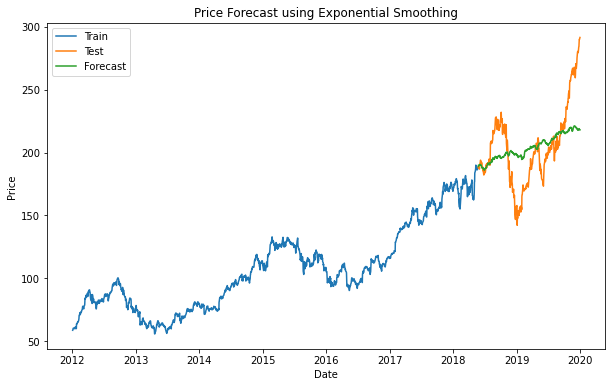

In [102]:
# Plotting the actual data, test and predicted data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df, label='Forecast')
plt.title('Price Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Making Forecast

In [103]:
# Holt-Winters Seasonal Model with additive trend and seasonality
model = ExponentialSmoothing(
    data,
    seasonal='add',
    trend='add',
    seasonal_periods=252
)

fitted_model = model.fit()

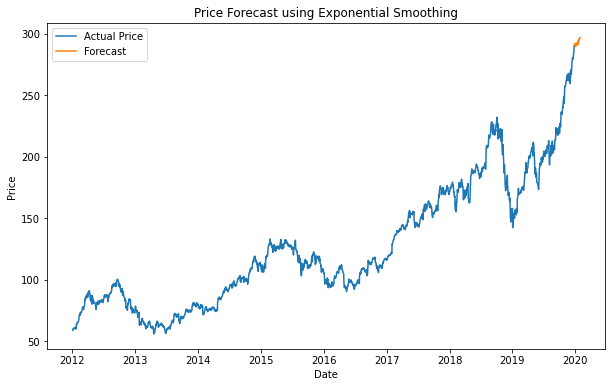

In [104]:
# Making Forecast for 30 days
forecast_steps = 30
forecast = fitted_model.forecast(forecast_steps)

forecast_dates = pd.date_range(
    start = data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)
forecast_df = pd.DataFrame(
    forecast.values,
    index=forecast_dates,
    columns=['Forecast']
)

# Plotting Forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Price')
plt.plot(forecast_df, label='Forecast')
plt.title('Price Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [105]:
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [106]:
# Defining Grid Parameters

param_grid = {
    'trend' : ['add', 'mul', None],
    'seasonal' : ['add', 'mul', None],
    'seasonal_periods' : [7, 30, 90, 252] # weekly, monthly, quartly, yearly seasonality
}

In [107]:
best_mae = float('inf')
best_params = {}

# Performing grid search
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            try:
                model = ExponentialSmoothing(
                    train,
                    trend=trend,
                    seasonal=seasonal,
                    seasonal_periods=seasonal_periods
                )
                fit = model.fit()
                forecast = fit.forecast(len(test))
                mae = mean_absolute_error(test['Close'], forecast)
                if mae < best_mae:
                    best_mae = mae
                    best_params = {
                        'trend': trend,
                        'seasonal': seasonal,
                        'seasonal_periods': seasonal_periods
                    }
            except:
                continue

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')

Best Parameters: {'trend': 'mul', 'seasonal': 'mul', 'seasonal_periods': 252}
Best MAE: 18.936177462722302


#### Building Model using Best Parameters

In [108]:
# Fitting using best parameters
final_model = ExponentialSmoothing(
    train,
    trend = best_params['trend'],
    seasonal = best_params['seasonal'],
    seasonal_periods= best_params['seasonal_periods']
)
best_fit = final_model.fit()

In [109]:
# Forecasting data
forecast = best_fit.forecast(len(test))
forecast_df = pd.DataFrame(forecast.values, index=test.index, columns=['Forecast'])

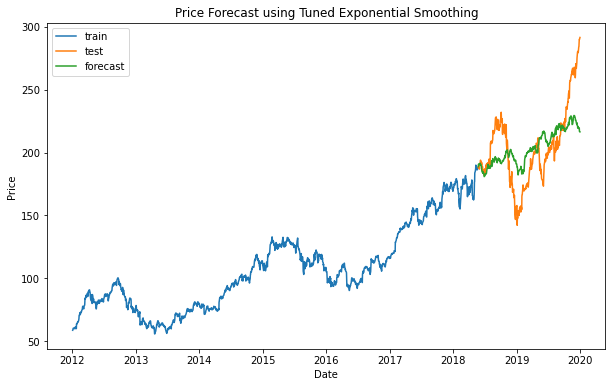

In [110]:
# Plotting Forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(forecast_df, label='forecast')
plt.title('Price Forecast using Tuned Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Making Forecasts

In [111]:
# Fitting using best parameters
final_model = ExponentialSmoothing(
    data,
    trend = best_params['trend'],
    seasonal = best_params['seasonal'],
    seasonal_periods= best_params['seasonal_periods']
)
final_fit = final_model.fit()

In [112]:
# Forecasting data
forecast_steps = 30
forecast = final_fit.forecast(forecast_steps)
forecast_dates = pd.date_range(
    start = data.index[-1] + pd.Timedelta(days=1),
    periods = forecast_steps,
    freq='D'
)
forecast_df = pd.DataFrame(forecast.values, index=forecast_dates, columns=['Forecast'])

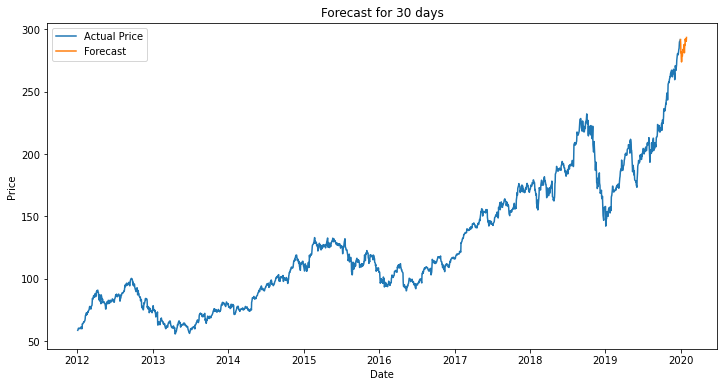

In [113]:
# Plotting Forecast
plt.figure(figsize=(12,6))
plt.plot(data, label='Actual Price')
plt.plot(forecast_df, label='Forecast')
plt.title('Forecast for 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()